<a href="https://colab.research.google.com/github/mhoch123/MAT422/blob/main/HW_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3.3
Authors: Megan Hoch and Bronwyn Curnow

#3.3.1. Necessary and sufficient conditions of local minimizers

**Global Minimizer:** Let $f: \mathbb{R}^{d} \rightarrow \mathbb{R}$. The point $\textbf{x}^{*} \in \mathbb{R}^{d}$ is a global minimizer of $f$ over $\mathbb{R}^{d}$ if: $f(\textbf{x}) \geq f(\textbf{x}^{*})$, $\forall \textbf{x} \in \mathbb{R}$

**Local Minimizer:** Let $f: \mathbb{R}^{d} \rightarrow \mathbb{R}$. The point $\textbf{x}^{*} \in \mathbb{R}^{d}$ is a local minimizer of $f$ over $\mathbb{R}^{d}$ if there is $\delta > 0$ such that: $f(\textbf{x}) \geq f(\textbf{x}^{*})$, $\forall \textbf{x} \in B_{\delta}(\textbf{x}^{*}) \ {\textbf{x}^{*}}$ If the inequality is strict, we say that $\textbf{x}^{*}$ is a strict local minimizer.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

x = np.linspace(-10,10,100)
y = (x+1) ** 2
def y2(x):
  return (x[0]+1)**2

min = sp.optimize.minimize(y2, [1,1])
print(min, '\n')

def y3(x):
  return -1 *x[0]

min = sp.optimize.minimize(y3, [1,1], bounds = [(-100,100), (-100,100)])
print(min)


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 3.5662963072207506e-16
        x: [-1.000e+00  1.000e+00]
      nit: 2
      jac: [-2.287e-08  0.000e+00]
 hess_inv: [[ 5.000e-01  0.000e+00]
            [ 0.000e+00  1.000e+00]]
     nfev: 9
     njev: 3 

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -100.0
        x: [ 1.000e+02  1.000e+00]
      nit: 2
      jac: [-1.000e+00  0.000e+00]
     nfev: 21
     njev: 7
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


Here we see two uses of scipy's minimize function. The first sucessfully returns the true global minimum of -1 at x =1. The second function has no minimum, so it returns the local minimum of -100 gives the bounds. If we were to run this second minimize without bounds, our code would generate an error, since there is no global minimum.

#3.3.2. Convexity and global minimizers

**Convex Set:** A set $D \in \mathbb{R}^{d}$ is convex if for all $\textbf{x, y} \in D$ and all $\alpha \in [0,1]$: $(1-\alpha)\textbf{x}+ \alpha \textbf{y} \in D$

**Convex Function:** A function $f$: $\mathbb{R}^{d} \rightarrow \mathbb{R}$ is convex if all $\textbf{x, y} \in \mathbb{R}^{d}$ and all $\alpha \in [0,1]$:
$f((1-\alpha)\textbf{x}+ \alpha \textbf{y}) \leq (1-\alpha)f(\textbf{x}) + \alpha f(\textbf{y}) $

Text(0.5, 1.0, 'Convex Function')

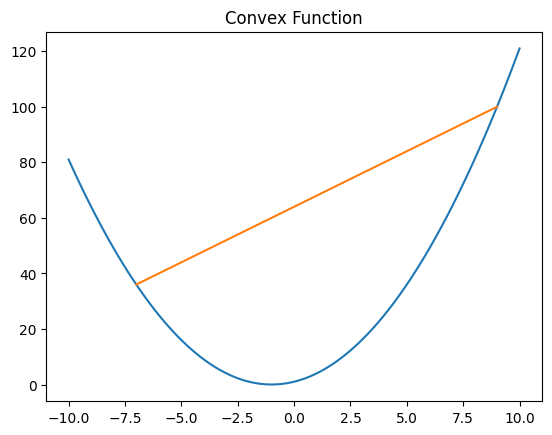

In [ ]:
plt.plot(x,y)
x2 = np.linspace(-7,9,500)
y2 = 4*x2 +64
plt.plot(x2,y2)
plt.title('Convex Function')

Text(0.5, 1.0, 'Concave Function')

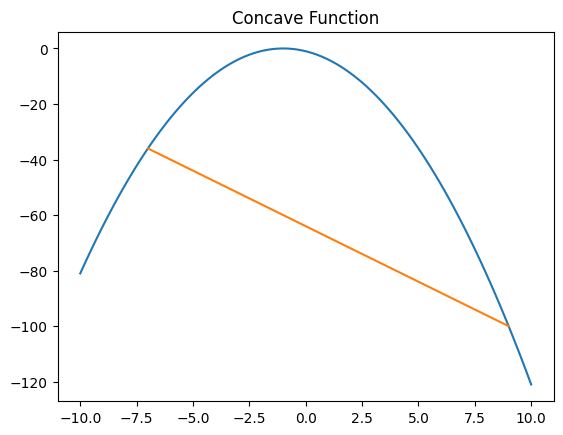

In [ ]:
y3 = -1*y
plt.plot(x,y3)
y2 = -4*x2-64
plt.plot(x2,y2)
plt.title('Concave Function')


Here we see examples of convex and concave functions. The first is convex since a connecting line from any two points lies above the function, and the second is concave because the same connecting line lies below the function.

#3.3.3. Gradient descent

**Gradient Descent:** An iterative optimization algorithm for finding local minimum of a differentiable function.

The local minimum is at x = -0.9999995053876091


<function matplotlib.pyplot.show(close=None, block=None)>

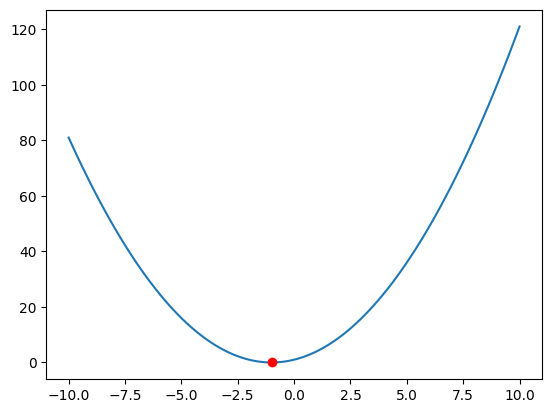

In [ ]:
def gradient_1d(currentx=1, stepsize=0.01, accuracy=1e-6, iteration_cap=10000):
    for i in range(iteration_cap):
        current_gradient = grad(currentx)
        if abs(current_gradient) < accuracy:
            print(f'The local minimum is at x = {currentx}')
            return currentx
        else:
          currentx = currentx - current_gradient * stepsize
    print('The local minimum could not be found')
    return

def grad(x):
  return 2*x+2

min = gradient_1d()

plt.plot(x,y)
plt.plot(min, (min+1)**2, 'ro')
plt.show

Here we see a function and it's local minimum, found with the gradient. Notice that the actual local minimum is at -1, which is quite close to the value we found of -0.999999!

The local minimum could not be found


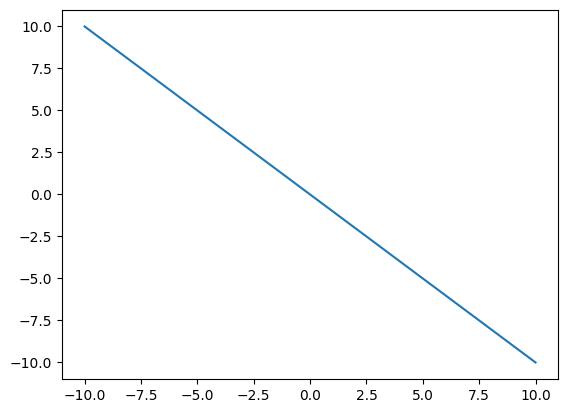

In [ ]:
y = -1 *x
def grad(x):
  return -1
min = gradient_1d()
plt.plot(x,y)

Now we see a function which does not have a minimum (it has a local minimum on the interval [-10,10], but it does not have a global minimum, and our code is not able to find the local minimum in the allowed iterations.